# Operações morfológicas
- São transformações aplicadas as imagens binárias ou tons de cinza
- É aplicada em formas e estruturas
- Objetivos de uma operação morfológica:
    - Aumentar o tamanho de um objeto
    - Reduzir o tamanho de um objeto
    - Fechar gaps entre objetos
    - Abrir gaps entre objetos
- São muito usadas no pré e pós processamento de imagens
- Existem diversas operações morfológicas, vamos focar nas seguintes:
    - a...

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Elemetos de estrutura (*structuring elements*)
- Podemos entender essa estrutura como uma variante de um kernel
- Porém, ao invés de aplicar convoluções, os algoritmos aplicam operações mais simples com os pixels da imagem
- Assim como kernels, essas estruturas vão deslizar sob toda a imagem
- E também possui diferentes formas, mas neste caso, vem o conceito de vizinhança, por exemplo:

![](assets/neighbourhoods.gif)


- Podemos criar uma estrutura com a função `getStructuringElement()`

In [3]:
M = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
M

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

- Carregando uma imagem:

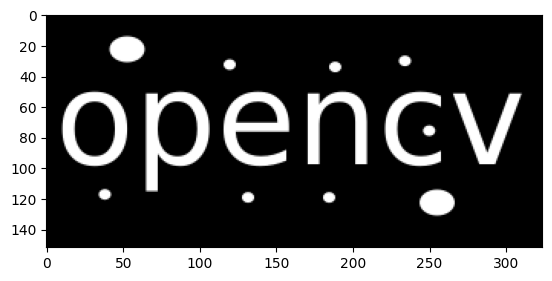

In [4]:
img = cv2.imread("assets/opencv.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")

## Erosão
- Aplica uma erosão na imagem pra diminuir o tamanho de alguma estrutura
- Em resumo, pixels proximos a bordas serão descartados 
- É definido um elemento de estrutura que vai percorrer toda a imagem
- Um pixel vai ser matindo se todos os pixels dentro da estrutura forem maiores do que zero
    - Caso contrario, são descartados, ou seja, igualados a zero
- Essa operação é muito útil para remover pequenos blobs em uma imagem ou desconectar algum objeto
- A função `erode()` faz o trabalho

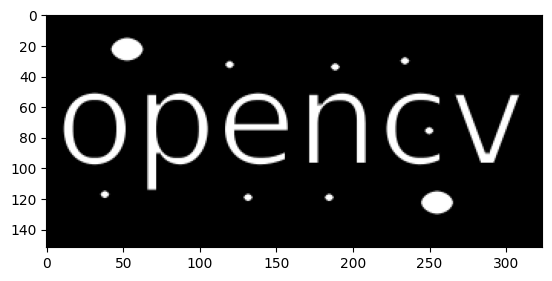

In [7]:
est = cv2.getStructuringElement(cv2.MORPH_ERODE, (3,3))
img_er = cv2.erode(img, est, iterations=1)
plt.imshow(img_er, cmap="gray")

- Quanto mais iterações, mais erosão

## Dilatação
- É o oposto da erosão
- A ideia é dilatar os pixels
- Também usa o elemento estrutural
    - O pixel central do elemento é zero se qualquer um é maior do que zero
- A função `dilate()` faz o trabalho

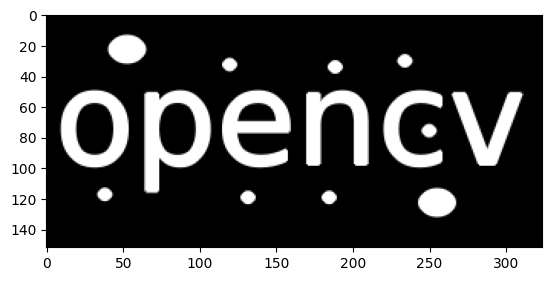

In [8]:
est = cv2.getStructuringElement(cv2.MORPH_DILATE, (3,3))
img_dil = cv2.dilate(img, est, iterations=1)
plt.imshow(img_dil, cmap="gray")

## Abertura
- Nada mais é do que uma erosão seguida de uma dilatação
- É útil para remover pequenos blobs da imagem
- Para realizar uma abertura usamos a função `morphologyEx()` passando como parametro `cv2.MORPH_OPEN`

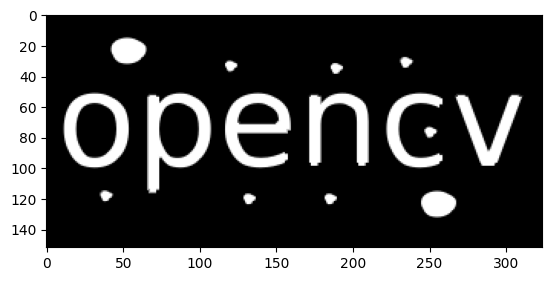

In [9]:
est = cv2.getStructuringElement(cv2.MORPH_CROSS, (4,4))
img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, est)
plt.imshow(img_open, cmap="gray")

- Podemos tentar trocar o tamanho da estrutura ou o formato dela

## Fechamento
- Como já deve imaginar, nada mais é do que o posto da abertura
- Aplica uma dilatação seguido de uma erosão
- É util para expandir e conectar estruturas
- Para realizar uma abertura usamos a função `morphologyEx()` passando como parametro `cv2.MORPH_CLOSE`

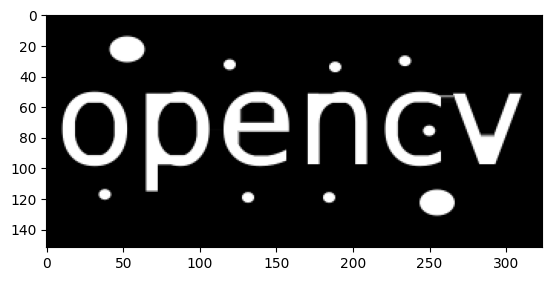

In [10]:
est = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
img_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, est)
plt.imshow(img_close, cmap="gray")

## Gradiente morfológico
- É a diferença entre dilatação e erosão
- É útil para criar *outline* de um objeto
- Para realizar uma abertura usamos a função `morphologyEx()` passando como parametro `cv2.MORPH_GRADIENT`

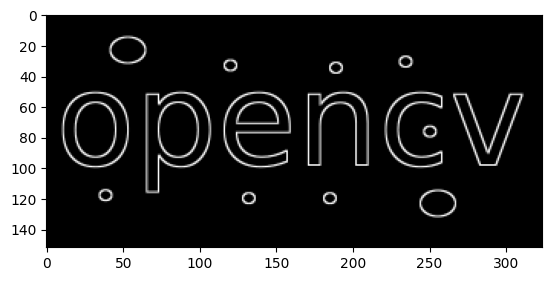

In [11]:
est = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
img_grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, est)
plt.imshow(img_grad, cmap="gray")

## White/Top hat e Black hat
- É a diferença entre a imagem original com 1 canal (tons de cinza ou preto e branco) e a operação de abertura
- É útil para revelar regiões com brilho dentro de imagens com background escuro
- Para realizar uma abertura usamos a função `morphologyEx()` passando como parametro `cv2.MORPH_BLACKHAT`
- Vamos carregar uma imagem de um carro para exemplificar

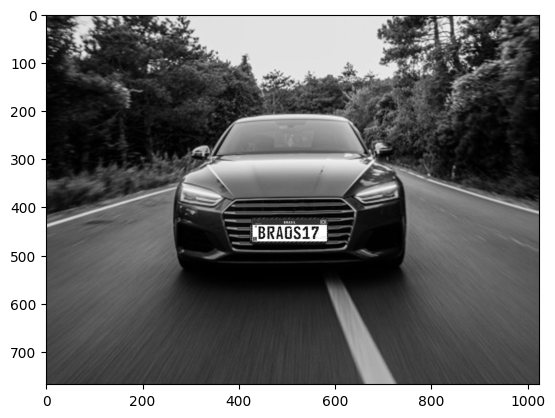

In [12]:
carro = cv2.imread("assets/carro.jpg")
carro = cv2.cvtColor(carro, cv2.COLOR_BGR2GRAY)
plt.imshow(carro, cmap="gray")

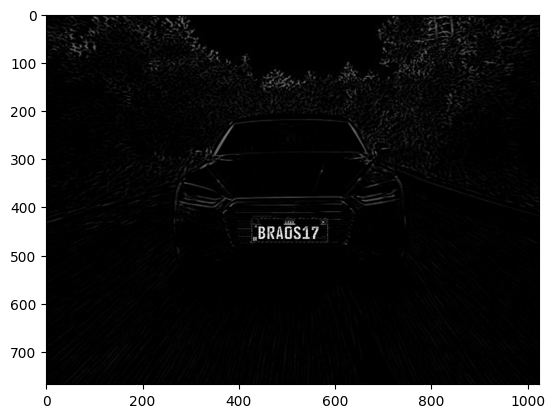

In [13]:
est = cv2.getStructuringElement(cv2.MORPH_RECT, (7,5))
carro_bh = cv2.morphologyEx(carro, cv2.MORPH_BLACKHAT, est)
plt.imshow(carro_bh, cmap="gray")

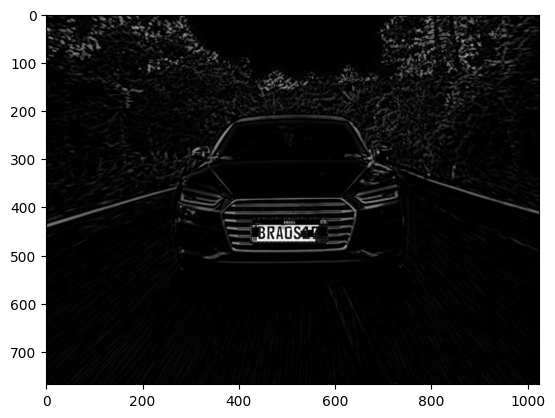

In [14]:
est = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
carro_th = cv2.morphologyEx(carro, cv2.MORPH_TOPHAT, est)
plt.imshow(carro_th, cmap="gray")

___

# Exercício
- Aplique um threshold usando o resultado da operação de BlackHat para obter uma mascara dos caracteres das placas

___

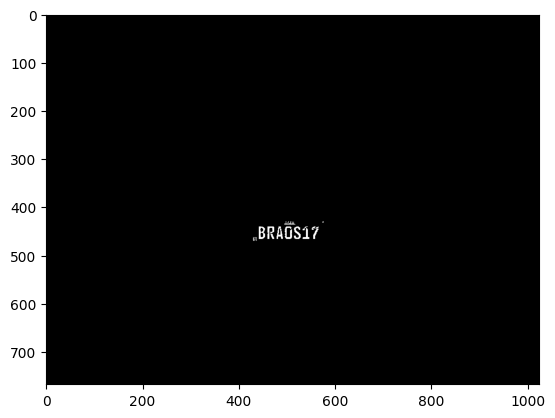

In [40]:
est = cv2.getStructuringElement(cv2.MORPH_RECT, (7,5))
carro_bh = cv2.morphologyEx(carro, cv2.MORPH_BLACKHAT, est)
t, forma_bw = cv2.threshold(carro_bh, 150, 255, cv2.THRESH_BINARY)

plt.imshow(forma_bw , cmap="gray")